# DMT 2022 - Homework 1

### **Group composition:**


D'Erasmo, Giulio, 1859130

Andrea, Potì, 2008416

### The homework consists of two parts:

  1. Search-Engine Evaluation

  and

  2. Near-Duplicate-Detection


#Homework

##Part 1: Search-Engine Evaluation

In this part of the homework, you have to index collections of documents to build search-engines using the PyTerrier library.

### Part 1.0
Import **ALL** the Python packages that you need for Part 1.

In [ ]:
#YOUR CODE STARTS HERE#
!pip install nptyping==1.4.4
!pip install python-terrier
import pyterrier as pt
import pandas as pd
import re
import matplotlib.pyplot as plt

#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

### Part 1.1

You have to build a search engine for the `irds:nfcorpus/dev` dataset and **improve the search-engines performance** (the higher the better).
####1.1.1
Download the dataset from the PyTerrier dataset list.

In [ ]:
#YOUR CODE STARTS HERE#
if not pt.started():
  pt.init()

dataset_name = 'irds:nfcorpus/dev'
dataset = pt.get_dataset(dataset_name) #download dataset


#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

####1.1.2
Choose several preprocessing configurations (at least 2, no more than 5). For each of them, construct an index on the `title` field. For the last of them, report the number of indexed documents and terms.

In [ ]:
#YOUR CODE STARTS HERE#
folder_pos = './indexFirstDataset' #folder position
possible_preprocessing = ["NoOp", #no preprocessing
                          "RemoveDiacritics", #remove accents
                          "Stopwords", #remove stopwords
                          "EnglishSnowballStemmer", #stemming
                          "Stopwords, EnglishSnowballStemmer"] #Both previous ones
def create_index(preprocessing_configuration, folder):
  indexer = pt.IterDictIndexer(folder,  meta_reverse = [], blocks = True)
  indexer.setProperty("termpipelines", preprocessing_configuration)
  indexref = indexer.index(dataset.get_corpus_iter(), fields=["title"])
  return indexref

indexFirstDataset_list = []
for i in range(0,len(possible_preprocessing)):
  indexFirstDataset_list.append(create_index(preprocessing_configuration = possible_preprocessing[i], folder = folder_pos+str(i)))
index_factory = pt.IndexFactory.of(indexFirstDataset_list[-1])
print("\n\n",index_factory.getCollectionStatistics().toString())
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

nfcorpus/dev documents:   0%|          | 0/5371 [00:00<?, ?it/s]

[INFO] If you have a local copy of https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz, you can symlink it here to avoid downloading it again: /root/.ir_datasets/downloads/49c061fbadc52ba4d35d0e42e2d742fd
[INFO] [starting] https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz

https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz: 0.0%| 0.00/31.0M [00:00<?, ?B/s]
https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz: 0.1%| 41.0k/31.0M [00:00<02:19, 222kB/s]
https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz: 0.3%| 90.1k/31.0M [00:00<01:38, 313kB/s]
https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz: 0.7%| 221k/31.0M [00:00<00:54, 567kB/s] 
https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz: 1.5%| 451k/31.0M [00:00<00:33, 915kB/s]
https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz: 2.5%| 762k/31.0M [00:00<00:23, 1.28MB/s]
https://www.cl.un

nfcorpus/dev documents:   0%|          | 0/5371 [00:00<?, ?it/s]

nfcorpus/dev documents:   0%|          | 0/5371 [00:00<?, ?it/s]

nfcorpus/dev documents:   0%|          | 0/5371 [00:00<?, ?it/s]

nfcorpus/dev documents:   0%|          | 0/5371 [00:00<?, ?it/s]



 Number of documents: 5371
Number of terms: 5072
Number of postings: 57283
Number of fields: 1
Number of tokens: 58358
Field names: [title]
Positions:   true



####1.1.3
Choose several weighting models (at least 3, no more than 5). For each of them, for each of the indices created in last step, build a retrieval model.

In [ ]:
#YOUR CODE STARTS HERE#
def create_retrieval_model(indexref, scoring_function):
  return pt.BatchRetrieve(index, wmodel = scoring_function)
# list of possible weighting models
possible_wmodels = ["CoordinateMatch",
                    "Tf",
                    "LemurTF_IDF",
                    "TF_IDF",
                    "BM25"]
retr_models = []
# for each index, for each weighting model, compute the model
for index in indexFirstDataset_list:
  fixed_index_models = []
  for wmodel in possible_wmodels:
    fixed_index_models.append(create_retrieval_model(index, scoring_function = wmodel))
  retr_models.append(fixed_index_models)
  

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

####1.1.4
Choose several evaluation metrics (at least 2, no more than 5) and put them in a list. Add the following metrics to the list: Precision at 5, Normalized Discounted Cumulative Gain at 10, Mean Reciprocal Rank. Obviously, the metrics you choose cannot be completely identical to these 3 we specified.

In [ ]:
#YOUR CODE STARTS HERE#
eval_metrics=["map",    # mean average precision
              "Rprec",  # R-precision (when P = R)
              "set_F",  # F-Measure (beta = 1, alpha = 1/2)
              "set_P",  # num_relevant_retrieved / num_retrieved
              "set_recall", # num_relevant_retrieved / num_relevant
              "P_5",
              "ndcg_cut_10",
              "recip_rank"]









#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

####1.1.5
For each index built in step 1.1.2, run an experiment to obtain the values associated to each evaluations metric specified in 1.1.4 for each of the weighting models chosen in 1.1.3.

In [ ]:
#YOUR CODE STARTS HERE#
topics = dataset.get_topics("title")
qrels = dataset.get_qrels()

experiment_for_each_index = []

for models_at_fixed_index in retr_models:
  experiment_for_each_index.append(pt.Experiment(
      models_at_fixed_index,
      topics,
      qrels,
      eval_metrics=eval_metrics,
      highlight="bold")
  )














#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:435: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['qid','query']), 1, inplace=True)


####1.1.6
For the last index constructed (i.e. corresponding to the last preprocessing chosen), print out the PyTerrier table with the weighting models chosen by you on the rows and the evaluation metrics chosen by you + those specified by us on the columns. Highlight the best results in the result table.

In [ ]:
#YOUR CODE STARTS HERE#
experiment_for_both_preprocessing = experiment_for_each_index[-1]
experiment_for_both_preprocessing





#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

,name,map,Rprec,set_F,set_P,set_recall,P_5,ndcg_cut_10,recip_rank
0,BR(CoordinateMatch),0.047509,0.069133,0.070128,0.119250,0.177370,0.144000,0.137627,0.299307
1,BR(Tf),0.042366,0.062163,0.070134,0.119254,0.177397,0.140923,0.130522,0.284080
2,BR(LemurTF_IDF),0.061108,0.088022,0.070199,0.119287,0.176783,0.193231,0.189161,0.391445
3,BR(TF_IDF),0.058921,0.085719,0.070181,0.119278,0.176563,0.190154,0.185305,0.390368
4,BR(BM25),0.058616,0.085647,0.070199,0.119287,0.176783,0.190154,0.184884,0.386156


####1.1.7
Select the Top-5 configurations (preprocessing, weighting model) according to the Mean Recirpocal Rank (MRR), taking into account all the results obtained in section 1.1.5.

In [ ]:
#YOUR CODE STARTS HERE#
field_to_search_max = 'recip_rank'

# For each experiments I will create a copy of the dataframe with only the column
# of 'name' and 'evaluation metrics' and add a column with the corresponding 
# preprocessing configuration.  
ALL_experiments = []
# for each experiments
for idx ,experiment in enumerate(experiment_for_each_index):
  tmp = experiment.data[[field_to_search_max, 'name']].copy()
  # add column pre-processing for each experiment 
  tmp.loc[:, ['preprocessing']] = possible_preprocessing[idx]
  ALL_experiments.append(tmp)

ALL_experiments_dataframe = pd.concat(ALL_experiments)
ALL_experiments_dataframe.reset_index(inplace = True)   # is need for the next step
ALL_experiments_dataframe.drop(columns = 'index', inplace = True) # drop extra column
# Get the 5 largest value in the recip_rank fields for ALL the models 
top_5_configuration = ALL_experiments_dataframe.nlargest(5, columns = field_to_search_max)
# reset the index
top_5_configuration.reset_index(inplace = True)







#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

For each of these 5 configurations, print out the pre-processing and weighting model applied.

In [ ]:
#YOUR CODE STARTS HERE#
# clean the name of each model inside the experiment table
pattern = r'\((.*?)\)'

for idx, name in enumerate(top_5_configuration['name']):
  top_5_configuration.loc[idx, ['name']] = re.search(pattern, name).group(1)

# return only the preprocessing and weighting model applied
top_5_configuration[['preprocessing','name']]









#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

,preprocessing,name
0,"Stopwords, EnglishSnowballStemmer",LemurTF_IDF
1,"Stopwords, EnglishSnowballStemmer",TF_IDF
2,"Stopwords, EnglishSnowballStemmer",BM25
3,EnglishSnowballStemmer,LemurTF_IDF
4,EnglishSnowballStemmer,TF_IDF


For these 5 configurations, provide the following plots (re-run the evaluations just for this configurations, to get the required evaluation metrics):

* P@k plot
    * the x axis represents the considered values for k: you must consider k 𝜖 {1, 3, 5, 10}
    * the y axis represents the average P@k over all provided queries
    * each curve represents one of the 5 search engine configurations

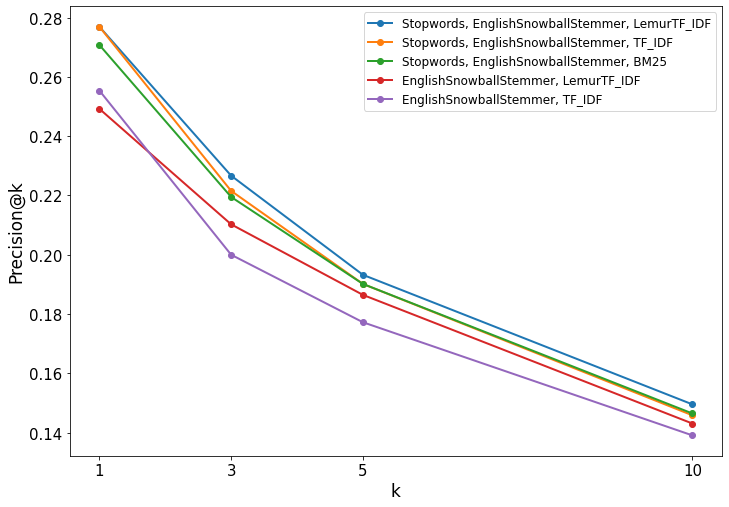

In [ ]:
#YOUR CODE STARTS HERE#
P_at_K_metrics = ['P_1', 'P_3', 'P_5', 'P_10'] # evaluation metrics requested
unlist_model = [model for model_group in retr_models for model in model_group] #all the models
preprocessing_label = [str(models[3]) for idx, models in top_5_configuration.iterrows()]   # initialize list of top-5-preprocessing label
wmodel_label = [str(models[2]) for idx, models in top_5_configuration.iterrows()]   # initialize list of top-5-wmodel
scores_for_each_model = [] # initialize list of the scores for each model
# for each configuration, compute the experiment
for idx, models in top_5_configuration.iterrows():
  retrieval_model = unlist_model[models[0]]  # retrieve the model
  P_at_K_experiment = pt.Experiment(
      [retrieval_model],
      topics,
      qrels,
      eval_metrics=P_at_K_metrics,
      highlight="bold")
  scores_for_each_model.append([P_at_K_experiment.data.iloc[0, 1:]])

# Plotting the scores
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (11.69,8.27))
for idx in range(len(scores_for_each_model)):
  ax.plot([1,3,5,10],  scores_for_each_model[idx][0],  marker='o', label = preprocessing_label[idx]+', '+wmodel_label[idx],
          linewidth=2)
ax.set_xticks([1,3,5,10])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel("Precision@k", fontsize = 17)
ax.set_xlabel("k", fontsize = 17)
ax.legend(fontsize = 12);
#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

* nDCG@k plot
    * the x axis represents the considered values for k: you must consider k 𝜖 {1, 3, 5, 10}
    * the y axis represents the average nDCG@k over all provided queries
    * each curve represents one of the 5 search engine configurations

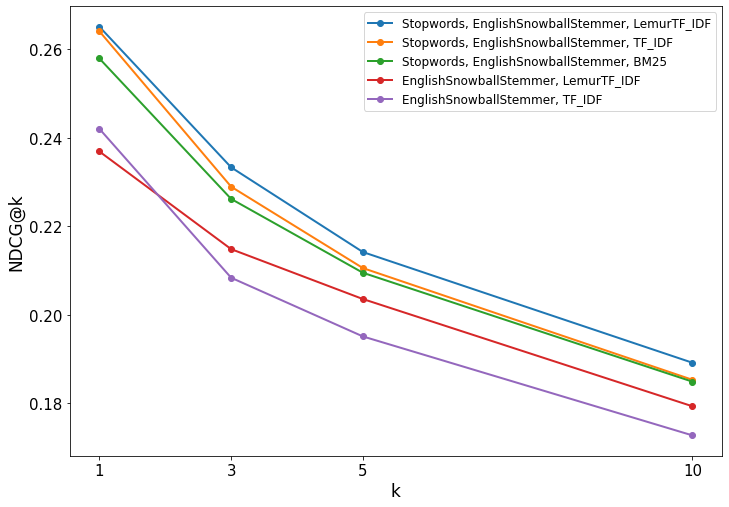

In [ ]:
#YOUR CODE STARTS HERE#
NDCG_at_K_metrics = ['ndcg_cut_1', 'ndcg_cut_3', 'ndcg_cut_5', 'ndcg_cut_10'] # evaluation metrics requested
# 
scores_for_each_model = [] # initialize list of the scores for each model
# for each configuration, compute the experiment
for idx, models in top_5_configuration.iterrows():
  retrieval_model = unlist_model[models[0]]  # retrieve the model
  NDCG_at_K_experiment = pt.Experiment(
      [retrieval_model],
      topics,
      qrels,
      eval_metrics=NDCG_at_K_metrics,
      highlight="bold"
      )
  scores_for_each_model.append([NDCG_at_K_experiment.data.iloc[0, 1:]])

# Plotting the scores
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (11.69,8.27))
for idx in range(len(scores_for_each_model)):
  ax.plot([1,3,5,10],  scores_for_each_model[idx][0],  marker='o', label = preprocessing_label[idx]+', '+wmodel_label[idx],
          linewidth=2)
ax.set_xticks([1,3,5,10])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel("NDCG@k", fontsize = 17)
ax.set_xlabel("k", fontsize = 17)
ax.legend(fontsize = 12);

#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

####1.1.8
According only to the nDCG@k plot, which is the best search engine configuration? Explain your answer in **at most three sentences**.

----------YOUR TEXT STARTS HERE----------

According only to the nDCG@k the best configuration is the search engine with pre-processing "Stopword" and "English Stemmer" using Lemur_TF_IDF model that is the one that gives us the better scores in the graph.

This because the TF_IDF weighting model in the variant of Lemur, works better with dropping stopword or stem the words. And in this way the engine perform better to rank higher revelant document at the top k postition. 

### Part 1.2

You will be given several scenarios and different requirements for each one. By respecting the requirements, you will have to choose the proper **configuration**, represented in terms of:
1. A suitable preprocessing (if any)
2. A suitable weighting model (if any)
3. A suitable evaluation metric (if any)

You must then:
1. Provide an explanation of your choice in **at most three sentences**.
2. Implement one search engine with this configuration and, if necessary, obtain the evaluation metrics you specified.

N.B. There is not necessarily only one correct answer.

#### 1.2.1
**Question 1:** The company A-DMT needs a search engine for the `irds:cranfield` dataset. In particular, it is interested in obtaining **exact matches** between the terms in the `author` field and the query terms; e.g. it does not want "apple" to be matched with "apples".

What is the configuration (as defined in part 1.2) that would best meet the needs of the A-DMT company? **Use at most 3 sentences.**

----------YOUR TEXT STARTS HERE----------

The best configuration for us is: remove stopwords, using Coordinate Match as weighting model and no evaluation metrics.

This because we are indexing the Author field, so we don't need to apply stemming or lemming over names or words as required from the company. 

The "Coordinate_Match" model because we are interested in find the exact documents where the author is mentioned with a score of 1 or 0 without the need to rank the documents.




Implement one search engine with this configuration and, if necessary, obtain the evaluation metrics you specified.

In [ ]:
#YOUR CODE STARTS HERE#
dataset_name = 'irds:cranfield'        
dataset = pt.get_dataset(dataset_name) #download dataset

folder_pos = './indexCranfieldDataset' #folder position
!rm -rf './indexCranfieldDataset'
preprocessing = ["Stopwords"]          
                         
indexer = pt.IterDictIndexer(folder_pos,  meta_reverse = [], blocks = True)
indexer.setProperty("termpipelines", preprocessing)
indexref = indexer.index(dataset.get_corpus_iter(), fields=["author"])
CoordinateMatch = pt.BatchRetrieve(indexref, wmodel="CoordinateMatch")

# io lo toglierei tanto è inutile
topics = dataset.get_topics()
qrels = dataset.get_qrels()

# testing
print()
CoordinateMatch.search('potter, whitfield') 








#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

cranfield documents:   0%|          | 0/1400 [00:00<?, ?it/s]

17:15:03.011 [ForkJoinPool-8-worker-3] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (281) - further warnings are suppressed
17:15:03.246 [ForkJoinPool-8-worker-3] WARN org.terrier.structures.indexing.Indexer - Indexed 53 empty documents



,qid,docid,docno,rank,score,query
0,1,42,43,0,1.0,"potter, whitfield"


#### 1.2.2
**Question 2:** The B-DMT company needs a search engine for the `irds:clinicaltrials/2017/trec-pm-2017` dataset for its app. The search engine they need will have to return to users the list of the top-6 results sorted in descending order of relevance to the given query. The company wants to evaluate the performance on query topic `disease` of a search engine built on the `summary` field.

What is the configuration (as defined in part 1.2) that would best meet the needs of the B-DMT company? **Use at most 3 sentences.**

----------YOUR TEXT STARTS HERE----------

The best configuration for us is: "Stopwords, EnglishSnowballStemmer"  for preprocessing, TF_IDF model and NDCG at 6 (since we want a search engine for top 6 result).

The pre-processing idea is to reduce the number of non important words, and in pair with the TF_IDF model we can give an higher scores to terms that appear many times within a small number of documents and lower to terms that accours in many summaries (scenario that is frequent is summary of a specific topic).

The choise of the evaluation metrics is based on the fact that we have multiple revelant judgments, more precise of $[0,1,2]$, so using a non binary metrics is what is may best for us.




Implement one search engine with this configuration and, if necessary, obtain the evaluation metrics you specified.

In [ ]:
#YOUR CODE STARTS HERE#
dataset_name = 'irds:clinicaltrials/2017/trec-pm-2017'
dataset = pt.get_dataset(dataset_name) #download dataset

folder_pos = './indexClinicalTrials' #folder position
!rm -rf './indexClinicalTrials'
preprocessing = ["Stopwords, EnglishSnowballStemmer"] 

# compute the model                      
indexer = pt.IterDictIndexer(folder_pos,  meta_reverse = [], blocks = True)
indexer.setProperty("termpipelines", preprocessing)
indexref = indexer.index(dataset.get_corpus_iter(), fields=["summary"])
TF_IDF = pt.BatchRetrieve(indexref, wmodel="TF_IDF")
TF_IDF_at_6 = TF_IDF % 6     # cut the result at the top 6

topics = dataset.get_topics('disease')
qrels = dataset.get_qrels()
# evaluate the search engine with the choosen configuration
model = TF_IDF_at_6.transform(topics)
evaluate = pt.Utils.evaluate(model, qrels, metrics=["ndcg_cut_6"])

# show the result
nice_print = pd.DataFrame( list(evaluate.items()) )
nice_print.rename(columns = {0: 'Evaluation metrics', 1: 'score'}, inplace = True)
print("\n\n")
nice_print


#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

clinicaltrials/2017/trec-pm-2017 documents:   0%|          | 0/241006 [00:00<?, ?it/s]

17:15:04.833 [ForkJoinPool-9-worker-3] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (NCT00589069) - further warnings are suppressed
17:16:30.649 [ForkJoinPool-9-worker-3] WARN org.terrier.structures.indexing.Indexer - Indexed 682 empty documents


/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:435: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['qid','query']), 1, inplace=True)


,Evaluation metrics,score
0,ndcg_cut_6,0.035283


##Part 2: Near-Duplicate-Detection

In this part of the homework, you have to find, in an approximated way, all near-duplicate documents inside a collection of documents.

These constraints **must** be satisfied while carrying out this part of the homework:

  * We will consider Near-duplicates all those pair of documents that have a Jaccard similarity greater than or equal to 0.95
  * Each set of shingles, that represents an original document, must be sketched in a Min-Hashing sketch with a length of at most 210
  * The probability to have as a near-duplicate candidate a pair of documents with Jaccard=0.95 must be > 0.97
  * The generation process of near-duplicate pairs you implement must generate the smallest amount of both **False-Negatives** and **False-Positives**
  * The running time of all the LSH process must be less than 10 minutes.

### Part 2.0
Import Python packages that you may need for Part 2.

In [ ]:
#YOUR CODE STARTS HERE#
import csv
import random 
import itertools as it 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

#### NDD functions
A range of functions to perform the Near-Duplicates pipeline is provided by us. You must use them, but **you may not modify or overwrite** them under any circumstances. If you have any doubts about how they work, have a look at them to get an idea of what they do.

##### Shingling

> The `cleaner` function will remove from a string all the characters that are not in a predefined set of characters of interest. Multiple spaces will be removed automatically. The function will also remove spaces at the start and end of the sentence, and change all the letters to lowercase.

In [ ]:
set__characters_of_interest = set(
    [' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
     'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
def cleaner(text, set__characters_of_interest):
    new_text = ""
    #
    previous_copied_character = "a"
    for c_character in text:
        #
        c_character = c_character.lower()
        #
        if c_character not in set__characters_of_interest:
            c_character = " "
        #
        if c_character == " " and c_character == previous_copied_character:
            continue
        #
        new_text += c_character
        #
        previous_copied_character = c_character
        #
    #
    new_text = new_text.strip()
    #
    return new_text

> The `get_shingle_id` function will transform a shingle (a tuple of strings) into its shingle id. The `map__shingle__shingle_id` dictionary will handle the mapping.

In [ ]:
def get_shingle_id(shingle):
    global max_shingle_id
    global map__shingle__shingle_id
    #
    shingle_id = map__shingle__shingle_id.get(shingle, -1)
    #
    if shingle_id >= 0:
        return shingle_id
    #
    max_shingle_id += 1
    shingle_id = max_shingle_id
    map__shingle__shingle_id[shingle] = max_shingle_id
    #
    return shingle_id

> The `shingler` function takes as input a string and (optionally) a shingle width. It splits the string into words, then iterates in groups of the given length, transforming each into its own shingle_id, and finally outputs the set of shingles that constitutes the sentence.

In [ ]:
def shingler(text, width=2):
    #
    set__shingle_id = set()
    #
    tokenized_text = text.split(" ")
    #
    max_index_plus_1 = 1 if len(tokenized_text) <= width else len(tokenized_text) - width +1
    for index in range(max_index_plus_1):
        #
        c_shingle = tuple(tokenized_text[index:index + width])
        #
        shingle_id = get_shingle_id(c_shingle)
        #
        # if shingle_id in set__shingle_id:
        #    print(shingle_id, c_shingle)
        #
        res = set__shingle_id.add(shingle_id)
        #
    return set__shingle_id

> This function will load each sentence inside the input file. The rows of the input file must have two attributes: document_id and document_text. For each record, the text will be processed by the `cleaner` function, turned into shingles by the `shingler` function, and the result will be written in the output file.

In [ ]:
def create_sets_of_shingle_ids(input_file_name, output_file_name,
                               input_file_delimiter='\t', input_file_quotechar='"',
                               set__characters_of_interest=[" "], shingle_width=3,
                               doc_id_column_idx=0, field_column_idx=1):
    #
    output_file = open(output_file_name, 'w', encoding="utf-8")
    output_file_csv_writer = csv.writer(output_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = ['set_id', 'set_of_integers']
    output_file_csv_writer.writerow(header)
    #
    input_file = open(input_file_name, 'r', encoding="utf-8")
    input_file_csv_reader = csv.reader(input_file, delimiter=input_file_delimiter, quotechar=input_file_quotechar)
    next(input_file_csv_reader)
    for record in input_file_csv_reader:
        #
        doc_id = int(record[doc_id_column_idx])
        document = record[field_column_idx]
        #
        cleaned_document = cleaner(document, set__characters_of_interest)
        #
        set__shingle_id = shingler(cleaned_document, width=shingle_width)
        #
        output_file_csv_writer.writerow([doc_id, set__shingle_id])
        #
        #
        if doc_id % 1000 == 0:
            print("Last processed doc_id:", doc_id)
        #
    input_file.close()
    output_file.close()
    print("Last processed doc_id:", doc_id)
    print()
    print("max_shingle_id=", max_shingle_id)
    print()
    print()
    return max_shingle_id

##### MinWise Hashing

> This simple function will (smartly) check if a number is prime.

In [ ]:
def is_prime(number):
    #
    if number == 2:
        return True
    if (number % 2) == 0:
        return False
    for j in range(3, int(number ** 0.5 + 1), 2):
        if (number % j) == 0:
            return False
    #
    return True

> The `create_hash_functions` function will take as input the number of hash function desired and the upper bound on the number of distinct elements. It will generate the three values `(a, b, p)` that defines an hash function `number_of_hash_functions` times and return all this information into a dictionary. The optional seed argument will be used to set the random seed, so that the hash function obtained can be controlled.

In [ ]:
def create_hash_functions(number_of_hash_functions, upper_bound_on_number_of_distinct_elements, seed=42):
    random.seed(seed)
    #
    map__hash_function_id__a_b_p = {}
    #
    set_of_all_hash_functions = set()
    while len(set_of_all_hash_functions) < number_of_hash_functions:
        a = random.randint(1, upper_bound_on_number_of_distinct_elements - 1)
        b = random.randint(0, upper_bound_on_number_of_distinct_elements - 1)
        p = random.randint(upper_bound_on_number_of_distinct_elements, 10 * upper_bound_on_number_of_distinct_elements)
        while is_prime(p) == False:
            p = random.randint(upper_bound_on_number_of_distinct_elements,
                               10 * upper_bound_on_number_of_distinct_elements)
        #
        c_hash_function = (a, b, p)
        set_of_all_hash_functions.add(c_hash_function)
    #
    for c_hash_function_id, c_hash_function in enumerate(set_of_all_hash_functions):
        map__hash_function_id__a_b_p[c_hash_function_id] = c_hash_function
    #
    return map__hash_function_id__a_b_p

> The `create_c_set_MinWiseHashing_sketch` function will receive as input a set of shingles, a list of hash functions parameters and the total number of hash functions to use. For each hash function, it applies it to each shingle and keeps the minimum value. It gives as output the MinWiseHashing sketch as a list.

In [ ]:
def create_c_set_MinWiseHashing_sketch(c_set,
                                       map_as_list__index__a_b_p,
                                       total_number_of_hash_functions):
    plus_inf = float("+inf")
    c_set_MinWiseHashing_sketch = [plus_inf] * total_number_of_hash_functions
    #
    for c_element_id in c_set:
        index = -1
        for a, b, p in map_as_list__index__a_b_p:
            index += 1
            #
            c_hash_value = (a * c_element_id + b) % p
            #
            if c_hash_value < c_set_MinWiseHashing_sketch[index]:
                c_set_MinWiseHashing_sketch[index] = c_hash_value
            #
        #   
    #
    return c_set_MinWiseHashing_sketch

> The `create_MinWiseHashing_sketches` function first generates the list of hash functions. Then it iterates through the input file containing the set of shingles for each document, computing the MinWiseHashing sketch for each set of shingles and storing this information into a dictionary. This variable is then saved into an output file.

In [ ]:
def create_MinWiseHashing_sketches(input_file_name, upper_bound_on_number_of_distinct_elements,
                                   number_of_hash_functions_that_is_also_the_sketch_lenght_and_also_the_number_of_simulated_permutations,
                                   output_file_name):
    #
    map__hash_function_id__a_b_p = create_hash_functions(
        number_of_hash_functions_that_is_also_the_sketch_lenght_and_also_the_number_of_simulated_permutations,
        upper_bound_on_number_of_distinct_elements)
    #
    map__set_id__MinWiseHashing_sketch = {}
    #
    total_number_of_hash_functions = len(map__hash_function_id__a_b_p)
    # sorted_list_all_hash_function_id = sorted(map__hash_function_id__a_b_p.keys())
    map_as_list__index__a_b_p = tuple([(a, b, p) for a, b, p in map__hash_function_id__a_b_p.values()])
    #
    input_file = open(input_file_name, 'r', encoding="utf-8")
    input_file_csv_reader = csv.reader(input_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = next(input_file_csv_reader)
    num_record_so_far = 0
    for record in input_file_csv_reader:
      num_record_so_far += 1
      if num_record_so_far % 100 == 0:
          print(num_record_so_far)
      c_set_id = int(record[0])
      c_set = eval(record[1])

      c_set_MinWiseHashing_sketch = create_c_set_MinWiseHashing_sketch(c_set,map_as_list__index__a_b_p,total_number_of_hash_functions)
      
      #print(len(c_set_MinWiseHashing_sketch))
      map__set_id__MinWiseHashing_sketch[c_set_id] = c_set_MinWiseHashing_sketch
    input_file.close()
    #
    output_file = open(output_file_name, 'w', encoding="utf-8")
    output_file_csv_writer = csv.writer(output_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = ['set_id', 'MinWiseHashing_sketch']
    output_file_csv_writer.writerow(header)
    sorted_list_all_set_id = sorted(map__set_id__MinWiseHashing_sketch.keys())
    for c_set_id in sorted_list_all_set_id:
        output_file_csv_writer.writerow([c_set_id, str(map__set_id__MinWiseHashing_sketch[c_set_id])])
    output_file.close()
    #
    return

##### Locality-Sensitive Hashing

> This function will simply load the MinWiseHashing sketches from the given input file.

In [ ]:
def load_map__set_id__MinWiseHashing_sketch_from_file(input_file_name):
    map__set_id__MinWiseHashing_sketch = {}
    #
    input_file = open(input_file_name, 'r', encoding="utf-8")
    input_file_csv_reader = csv.reader(input_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = next(input_file_csv_reader)
    for record in input_file_csv_reader:
        c_set_id = int(record[0])
        c_MinhiseHashing_sketch = tuple(eval(record[1]))
        #
        map__set_id__MinWiseHashing_sketch[c_set_id] = c_MinhiseHashing_sketch
        #
    input_file.close()
    #
    return map__set_id__MinWiseHashing_sketch

> The function computes the sets of unordered couples of document identifiers for which there is at least one band in common between the MinWiseHashing sketches. It takes in input the number or rows and the number of bands and the MinWiseHashing sketches. The number of rows (r) multiplied by the number of bands (b) must be equal to the size of the sketches (n): r*b = n.

In [ ]:
def get_set_of_CANDIDATES_to_be_near_duplicates(r, b, map__set_id__MinWiseHashing_sketch):
    #
    set_of_CANDIDATES_to_be_near_duplicates = set()
    #
    for c_band_progressive_id in range(b):
        #
        print("c_band_progressive_id", c_band_progressive_id)
        #
        c_band_starting_index = c_band_progressive_id * r
        c_band_ending_index = (c_band_progressive_id + 1) * r
        #
        map__band__set_set_id = {}
        #
        for c_set_id in map__set_id__MinWiseHashing_sketch:
            #
            if r * b != len(map__set_id__MinWiseHashing_sketch[c_set_id]):
                n = len(map__set_id__MinWiseHashing_sketch[c_set_id])
                message = "ERROR!!! n != r*b " + str(n) + "!=" + str(r * b) + "; " + str(n) + "!=" + str(r) + "*" + str(
                    b)
                raise ValueError(message)
            #
            c_band_for_c_set = tuple(
                map__set_id__MinWiseHashing_sketch[c_set_id][c_band_starting_index:c_band_ending_index])
            #
            if c_band_for_c_set not in map__band__set_set_id:
                map__band__set_set_id[c_band_for_c_set] = set()
            map__band__set_set_id[c_band_for_c_set].add(c_set_id)
            #

        for c_set_set_id in map__band__set_set_id.values():
            #
            if len(c_set_set_id) > 1:
                #
                for set_id_a, set_id_A in it.combinations(c_set_set_id, 2):
                    if set_id_a < set_id_A:
                        set_of_CANDIDATES_to_be_near_duplicates.add((set_id_a, set_id_A))
                    else:
                        set_of_CANDIDATES_to_be_near_duplicates.add((set_id_A, set_id_a))
        #
    #
    return set_of_CANDIDATES_to_be_near_duplicates

> Given two MinWiseHashing sketches, this function will iterate through each of them, counting how many items are equal. Then, it will output this count divided by the length of the sketches.

In [ ]:
def compute_approximate_jaccard(set_a_MinWiseHashing_sketch, set_b_MinWiseHashing_sketch):
    appx_jaccard = 0.
    #
    for index in range(len(set_a_MinWiseHashing_sketch)):
        #
        if set_a_MinWiseHashing_sketch[index] == set_b_MinWiseHashing_sketch[index]:
            appx_jaccard += 1
        #
    appx_jaccard /= len(set_a_MinWiseHashing_sketch)
    #
    return appx_jaccard

> Given a Jaccard Threshold, this function will iterate through the list of near duplicates CANDIDATES, computing for each of them the approximate jaccard. If this value overcomes the threshold, the candidate pair is added to a dictionary to be returned.

In [ ]:
def compute_approximate_jaccard_to_REDUCE_the_number_of_CANDIDATES_to_be_near_duplicates(
        set_of_CANDIDATES_to_be_near_duplicates,
        map__set_id__MinWiseHashing_sketch, jaccard_threshold):
    map__set_a_id__set_A_id__appx_jaccard = {}
    #
    for set_a_id, set_A_id in set_of_CANDIDATES_to_be_near_duplicates:
        #
        set_a_MinWiseHashing_sketch = map__set_id__MinWiseHashing_sketch[set_a_id]
        set_A_MinWiseHashing_sketch = map__set_id__MinWiseHashing_sketch[set_A_id]
        #
        appx_jaccard = compute_approximate_jaccard(set_a_MinWiseHashing_sketch, set_A_MinWiseHashing_sketch)
        #
        if appx_jaccard >= jaccard_threshold:
            map__set_a_id__set_A_id__appx_jaccard[(set_a_id, set_A_id)] = appx_jaccard
        #
    #
    return map__set_a_id__set_A_id__appx_jaccard

> This function simply calls all the four previous functions in order; loads the MinWiseHashing sketches, gets the CANDIDATES to be near-duplicates and computes the approximate Jaccard to REDUCE the number of CANDIDATES.

In [ ]:
def mine_couples_of_Near_Duplicates(input_file_name, r, b, jaccard_threshold):
    #
    print("Starting the loading of the MinWiseHashing sketches from the input file.")
    map__set_id__MinWiseHashing_sketch = load_map__set_id__MinWiseHashing_sketch_from_file(input_file_name)
    print()
    print("Number of sets=", len(map__set_id__MinWiseHashing_sketch))
    print()
    #
    print("Starting the mining of the CANDIDATES couples to be near duplicates.")
    set_of_CANDIDATES_to_be_near_duplicates = get_set_of_CANDIDATES_to_be_near_duplicates(r, b,
                                                                                          map__set_id__MinWiseHashing_sketch)
    #
    print()
    print("Number of pairs of sets to be near-duplicate CANDIDATES=", len(set_of_CANDIDATES_to_be_near_duplicates))
    print()
    #
    map__set_a_id__set_A_id__appx_jaccard = compute_approximate_jaccard_to_REDUCE_the_number_of_CANDIDATES_to_be_near_duplicates(
        set_of_CANDIDATES_to_be_near_duplicates, map__set_id__MinWiseHashing_sketch, jaccard_threshold)
    print()
    print("Number of REFINED pairs of sets to be near-duplicate CANDIDATES=",
          len(map__set_a_id__set_A_id__appx_jaccard))
    print()
    #
    output_file = open(output_file_name, 'w', encoding="utf-8")
    output_file_csv_writer = csv.writer(output_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = ['set_a_id', 'set_b_id', 'approximate_jaccard']
    output_file_csv_writer.writerow(header)
    sorted_list_all_set_id = sorted(map__set_id__MinWiseHashing_sketch.keys())
    for set_a_id__set_A_id in map__set_a_id__set_A_id__appx_jaccard:
        appx_jaccard = map__set_a_id__set_A_id__appx_jaccard[set_a_id__set_A_id]
        output_file_csv_writer.writerow([set_a_id__set_A_id[0], set_a_id__set_A_id[1], appx_jaccard])
    output_file.close()
    return

### Part 2.1

####2.1.1
Download the dataset from the Drive link (code already provided). 

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
!gdown 1zvpg8b4JvmXUciJI4sg1xq5RFuaBm_nD

Downloading...
From: https://drive.google.com/uc?id=1zvpg8b4JvmXUciJI4sg1xq5RFuaBm_nD
To: /content/250K_lyrics_from_MetroLyrics.csv
100% 307M/307M [00:01<00:00, 169MB/s]


####2.1.2
Inspect the dataset: print the list of fields names. Print the value of the `artist` field for the first and last document.

In [ ]:
#YOUR CODE STARTS HERE#
# import the dataset
Lyrics = pd.read_csv('/content/250K_lyrics_from_MetroLyrics.csv')

# print the Lyrics field
lyrics_field = list(Lyrics.columns) 
nice_print = pd.DataFrame( lyrics_field )
nice_print.rename(columns = {0: 'Lyrics Fields'}, inplace = True)
print(nice_print)
print()

# print of the Artis field for the first and last document
print("Artist field for the first document:", Lyrics.artist.iloc[0])
print()
print("Artist field for the last document:",Lyrics.artist.iloc[-1])



#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

  Lyrics Fields
0            ID
1          song
2          year
3        artist
4         genre
5        lyrics

Artist field for the first document: beyonce-knowles

Artist field for the last document: dwight-yoakam


####2.1.3
Turn the lyrics field of each document into a sets of shingles of length 3 and save the result to a file named `hw1__set_id__set_of_integers.tsv`

In [ ]:
#YOUR CODE STARTS HERE#
lyrics_field = Lyrics.lyrics

# define all the parameters for the shingle creation
input_file_name = "250K_lyrics_from_MetroLyrics.csv"
input_file_delimiter = ','
input_file_quotechar = '"'
output_file_name = "hw1__set_id__set_of_integers.tsv"
shingle_width = 3
doc_id_column_idx = 0
field_column_idx = 5

# compute the sets of shingles
max_shingle_id = -1
map__shingle__shingle_id = {}
max_shingle_id = create_sets_of_shingle_ids(input_file_name, output_file_name, input_file_delimiter,
                                            input_file_quotechar, set__characters_of_interest, shingle_width,
                                            doc_id_column_idx, field_column_idx)
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

####2.1.4
Load the file containing the sets of shingles and apply MinWiseHashing, saving the result into a file named `hw1__set_id__MinWiseHashing_sketch.tsv`. Choose the number of hash functions (n) in relation to the constraints highlighted at the beginning of part 2. Provide an explanation for your choice in **exactly one sentence**.

----------YOUR TEXT STARTS HERE----------

We decided to choose #hash_functions = 210, because trying different configurations of (n_hash, r,b) we found that with this value we have a great number of candidate remaining in the required condition and also we want to have quality refined candidates (less FP), instead of using a lower number of hash function that reduce the accuracy of the jaccard similarity without trade quantity for quality. 

In [ ]:
#YOUR CODE STARTS HERE#
input_file_name = "hw1__set_id__set_of_integers.tsv"
max_shingle_id = 17562076
output_file_name = "hw1__set_id__MinWiseHashing_sketch.tsv"

number_of_hash_functions_that_is_also_the_sketch_length_and_also_the_number_of_simulated_permutations = 210

create_MinWiseHashing_sketches(input_file_name, max_shingle_id,
                               number_of_hash_functions_that_is_also_the_sketch_length_and_also_the_number_of_simulated_permutations,
                               output_file_name)








#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

####2.1.5
To perform Locality Sensivity Hashing, you have to choose the number of rows (r) and the number bands (b). List all the possible choices of r and b that satisfy the constraints highlighted at the beginning of part 2, according to the number of hash functions you chose.

For all of these configurations, plot all the associated S-curves. The S-curve is defined as the probability (y-axis) that a pair of documents with Jaccard similarity j (x-axis) is selected as a near-duplicate candidate given r and b. Plot all S-curves in the same plot.

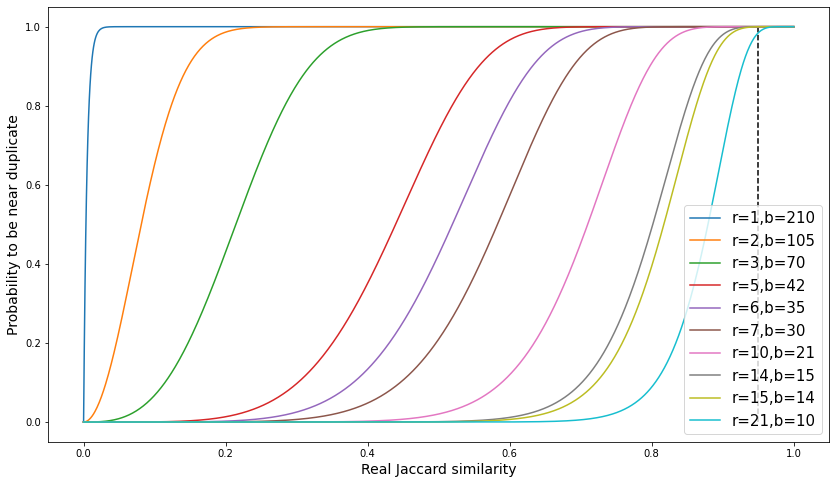

In [ ]:
#YOUR CODE STARTS HERE#
n_hash = number_of_hash_functions_that_is_also_the_sketch_length_and_also_the_number_of_simulated_permutations
r_grid = range(1,n_hash+1)
b_grid = range(1,n_hash+1)

def S_curve(r,b, s = 0.95):
  return( 1-(1-s**r)**b )

pair = []
for r in r_grid:
  for b in b_grid:
    if S_curve(r,b) > 0.97 and r*b == n_hash:
      pair.append((r,b))
    
x_grid = np.linspace(0, 1, num = 1000)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (14,8))
for par in pair:
  yy = S_curve(par[0], par[1], x_grid)
  name = 'r='+str(par[0])+',b='+str(par[1])
  ax.plot(x_grid,  yy, label = name)

plt.vlines(x = .95, ymin = 0, ymax = 1, linestyles = 'dashed', colors = 'k')
ax.set_xlabel('Real Jaccard similarity', fontsize = 14)
ax.set_ylabel('Probability to be near duplicate', fontsize = 14)
ax.legend(fontsize = 15);



#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

####2.1.6
Among all the configurations you plotted in the previous step, choose the one that gives the smallest amount of False-Positives and False-Negatives near-duplicates candidates, satisfying the provided constraints. You **must** take into account, that after the LSH procedure, the approximate Jaccard similarity between near-duplicate candidates is computed and used to reduce their number.

Provide an explanation for your choice in **at most 3 sentences**.

----------YOUR TEXT STARTS HERE----------

We decide to choose the couple $(r,b) = (3, 70)$ because after trying all the possible configuration , this is the one that gives us **more** candidate (with possible more FP) and lower FN in the required time $< 10$ min. 

The goals for us is that at fixed number of hash functions, assuming a set of configurations that finish in time the LSH procedure, we choose the one that gives more candidate, without the risk of obtaining more FP, because this number will be reduce using the Approximate Jaccard part of the pipeline.

In [ ]:
#YOUR CODE STARTS HERE#
r = 3
b = 70
#YOUR CODE ENDS HERE#
#THIS IS LINE 5#

####2.1.7
Load the file containing the MinWiseHashing sketches and perform Locality Sensivity Hashing, using the parameters you chose in last step, considering also the computation of approximate Jaccard to reduce the number of candidates. Save the Near-Duplicates candidates obtained to a file named `hw1__NearDuplicates__set_a_id__set_b_id__approximate_jaccard.tsv`.

Print the execution time.

In [ ]:
#YOUR CODE STARTS HERE#
jaccard_threshold = 0.95

input_file_name = "hw1__set_id__MinWiseHashing_sketch.tsv"
output_file_name = "hw1__NearDuplicates__set_a_id__set_b_id__approximate_jaccard.tsv"

start = timer()
mine_couples_of_Near_Duplicates(input_file_name, r, b, jaccard_threshold)
end = timer()

def print_execution_time(start,end):
  hours, rem = divmod(end-start, 3600)
  minutes, seconds = divmod(rem, 60)
  print("The execution time of the LSH + Approx Jaccard pipeline is: {:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

print("\n\n")
print_execution_time(start,end)











#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Starting the loading of the MinWiseHashing sketches from the input file.

Number of sets= 249999

Starting the mining of the CANDIDATES couples to be near duplicates.
c_band_progressive_id 0
c_band_progressive_id 1
c_band_progressive_id 2
c_band_progressive_id 3
c_band_progressive_id 4
c_band_progressive_id 5
c_band_progressive_id 6
c_band_progressive_id 7
c_band_progressive_id 8
c_band_progressive_id 9
c_band_progressive_id 10
c_band_progressive_id 11
c_band_progressive_id 12
c_band_progressive_id 13
c_band_progressive_id 14
c_band_progressive_id 15
c_band_progressive_id 16
c_band_progressive_id 17
c_band_progressive_id 18
c_band_progressive_id 19
c_band_progressive_id 20
c_band_progressive_id 21
c_band_progressive_id 22
c_band_progressive_id 23
c_band_progressive_id 24
c_band_progressive_id 25
c_band_progressive_id 26
c_band_progressive_id 27
c_band_progressive_id 28
c_band_progressive_id 29
c_band_progressive_id 30
c_band_progressive_id 31
c_band_progressive_id 32
c_band_progressive

####2.1.8
Load the file containing the number of near-duplicates candidates. Print the number of near-duplicates candidates you found.

In [ ]:
#YOUR CODE STARTS HERE#

near_duplicate_pairs = pd.read_csv("hw1__NearDuplicates__set_a_id__set_b_id__approximate_jaccard.tsv",
                                   sep='\t')

print("The number of near-duplicates candidates are:", len(near_duplicate_pairs))






















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

The number of near-duplicates candidates are: 34091


### Part 2.2
You will be given different scenarios and you will have to provide the best solution.

####2.2.1
Explain in **at most 3 sentences** how is possible to modify the provided Near-Duplicates Detection pipeline to have exactly 0 False-Positives in output. A brute-force approach is not considered as a valid solution.

----------YOUR TEXT STARTS HERE----------

The FP given by the LSH, are pair that have true jaccard similarity less than the treshold but are in the output.

So if we want to modify the pipeline to have 0 FP, after we have a set of near duplicate given by the LSH phase, we can directly perform the true jaccard similarity on the documents using the shingle matrix instead of the approximate jaccard that will use the sketch.

In this way the FP that pass the LSH, will perfectly removed by the real jaccard but we will surely increase the computational time.


####2.2.2
Consider the following scenario. You have to perform the entire Near-Duplicates pipeline by using exactly 1 hash function (n = r = b = 1). If we consider as Near-duplicates only couples of documents with Jaccard similarity exactly equal to 1, what is the amount of False-Positives and False-Negatives near-duplicates candidates generated in output by this configuration?

Provide your answer in **at most 3 sentences**.

----------YOUR TEXT STARTS HERE----------

If we look at the S-curve with parameter $n=r=b=1$ we have that $1-(1-x^r)^b = 1-(1-x^1)^1=x$, so the S-curve is just the $y=x$ line with the number of FP given by the area under the curve at the treshold = 1 that is equal to $1/2$, and the number of FN is zero. 

Then if we move to the next step, there is the computation of the approximate jaccard that is $\frac{\#collision}{len(sketch)}=\frac{\#collision}{1}$ and in this case is 0/1 = 0, if there is no collision, 1 (= the only match possible) otherwise.

As a result, the signature matrix is a $1 \times \#doc$ matrix, so the candidate pairs of the LSH are the couples that share the same single value (collision), but at the same time the jaccard approximation is based on the same single value, so this phase doesn't change the number of FP.